In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

First 10 data points: [3 5 5 1 1 2 5 3 4 4]
Averaged Value or MLE: 2.79


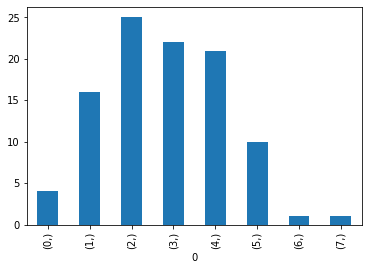

In [5]:
# Take 100 samples of a Possion(3) distribution3.5
Y = np.random.poisson(lam = 3, size = 100)
print(f'First 10 data points: {Y[:10]}')

pd.DataFrame(Y).value_counts(sort = False).plot.bar()
print(f'Averaged Value or MLE: {round(np.mean(Y), 3)}')

In [3]:
lam, size = 3.7, 100
print(f'True Distribution: Poisson({lam})')
print(f'Sample Size: {size}')
print('----------------------------------')
for _ in range(10):
    Y = np.random.poisson(lam = lam, size = size)
    mle = np.mean(Y)
    print(f"Set {_}: MLE = {format(mle, '.1f')}")

True Distribution: Poisson(3.7)
Sample Size: 100
----------------------------------
Set 0: MLE = 3.7
Set 1: MLE = 3.6
Set 2: MLE = 3.4
Set 3: MLE = 3.5
Set 4: MLE = 3.5
Set 5: MLE = 4.1
Set 6: MLE = 3.6
Set 7: MLE = 3.7
Set 8: MLE = 3.6
Set 9: MLE = 3.7


# Question 2
$$Y_i|X_i \sim \textrm{Poisson}(\mu_i)$$
$$\log(\mu_i)=\beta_0+\sum_{j=1}^p\beta_j x_{ij}\quad\textrm{and}\quad\mu_i=\exp\left(\beta_0+\sum_{j=1}^p\beta_j x_{ij}\right)$$

## Useful Derivatives
#### For $\beta_0$
$$\frac{\partial}{\partial\beta_0}\log(\mu_i) = 1, \quad \frac{\partial \mu_i}{\partial\beta_0}=\exp\left(\beta_0+\sum_{j=1}^p\beta_j x_{ij}\right)=\mu_i$$

#### For $\beta_j$ with $j\neq 0$
$$\frac{\partial}{\partial\beta_j}\log(\mu_i) = x_{ij}, \quad \frac{\partial \mu_i}{\partial\beta_0}=\exp\left(\beta_0+\sum_{j=1}^p\beta_j x_{ij}\right)x_{ij}=\mu_ix_{ij}$$

## Minimisation
$$\min_\beta\left\{\sum_{i=1}^n\left[\mu_i - y_i\log(\mu_i)\right]+\lambda\sum_{j=1}^p\beta_j^2\right\}$$
$$S(\mathbf{\beta}) = \sum_{i=1}^n\left[\mu_i - y_i\log(\mu_i)\right]+\lambda\sum_{j=1}^p\beta_j^2$$

#### For $\beta_0$
$$\frac{\partial S}{\partial \beta_0}=\sum_{i=1}^n\left[\frac{\partial\mu_i}{\partial \beta_0} - y_i\frac{\partial\log(\mu_i)}{\partial \beta_0}\right]=\sum_{i=1}^n\left[\mu_i - y_i\right]$$

#### For $\beta_j$ with $j\neq 0$
$$\frac{\partial S}{\partial \beta_j}=\sum_{i=1}^n\left[\frac{\partial\mu_i}{\partial \beta_j} - y_i\frac{\partial\log(\mu_i)}{\partial \beta_j}\right] + \lambda\frac{\partial}{\partial \beta_j}\left(\sum_{j=1}^p\beta_j^2\right)=\sum_{i=1}^n\left[\mu_ix_{ij} - y_ix_{ij}\right]+2\lambda\beta_j$$

### The Data Generating Process
For simplicity, I will set the underlying generating process as
$$\mu_i = e^{2 X_i}$$
and we sample from 
$$Y_i|X_i\sim\textrm{Poisson}(\mu_i)=\textrm{Poisson}(e^{2X_i})$$

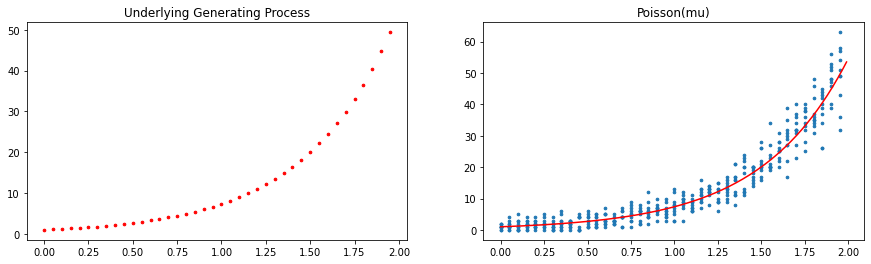

In [4]:
fig = plt.figure(figsize = (15, 4))

true_beta = 2

# Get the underying generating process
X = np.arange(0, 2, 0.05)
mu = np.exp(true_beta*X)

# Plot the Underlying generating process
plt.subplot(1, 2, 1)
plt.scatter(X, mu, s = 7, color = 'red')
plt.title('Underlying Generating Process')


# Sample from Poisson(mu_i)
n = 10 # At each point of X_i, take 10 samples
Y_train = np.array([np.random.poisson(lam = lam, size = n) for lam in mu]).flatten()
X_train = np.array([x*np.ones(n) for x in X]).flatten()

# Plot the Sampled Points
plt.subplot(1, 2, 2)
plt.scatter(X_train, Y_train, s = 7)

X = np.arange(0, 2, 0.01)
plt.plot(X, np.exp(2*X), color = 'red')
plt.title('Poisson(mu)');

If you look carefully enough, you'd notice that the dataset above is kind of weird. Mainy because for a given value of $X$ you have multiple values of $Y$. But it should give a good understanding of what is happening when we say $Y|X\sim\textrm{Poisson}(\mu)$

Instead we use something a bit different, but is basically the same thing.

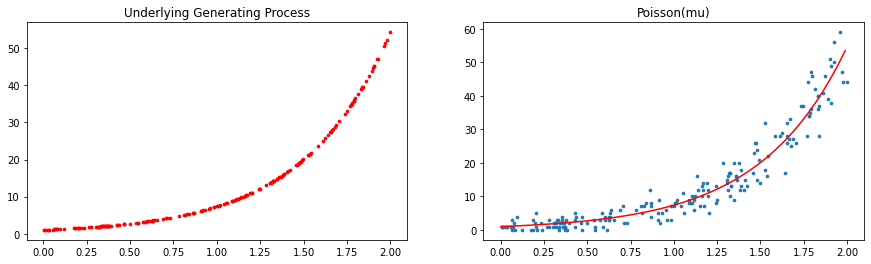

In [5]:
fig = plt.figure(figsize = (15, 4))

true_beta = 2

# Get the underying generating process
X = np.random.rand(200)*2
mu = np.exp(true_beta*X)

# Plot the Underlying generating process
plt.subplot(1, 2, 1)
plt.scatter(X, mu, s = 7, color = 'red')
plt.title('Underlying Generating Process')


# Sample from Poisson(mu_i)
n = 1 # At each point of X_i, take 1 samples
Y_train = np.array([np.random.poisson(lam = lam, size = n) for lam in mu]).flatten()
X_train = np.array([x*np.ones(n) for x in X]).flatten()

# Plot the Sampled Points
plt.subplot(1, 2, 2)
plt.scatter(X_train, Y_train, s = 7)

X = np.arange(0, 2, 0.01)
plt.plot(X, np.exp(2*X), color = 'red')
plt.title('Poisson(mu)');

It is important that you recognise that we don't actually know the underlying generative process. That is we don't actually know that $Y_i|X_i\sim\textrm{Poisson}(e^{2X_i})$. BUT, we know two things.
1. $Y_i|X_i\sim\textrm{Poisson}(e^{\beta X_i})$ for some value of $\beta$
2. We have the sample data points, as seen below

Using these two information we want to find $\beta$.

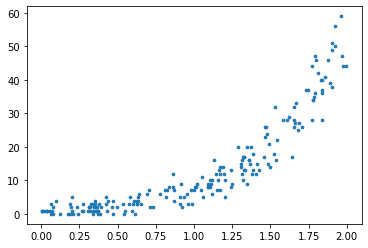

In [6]:
plt.scatter(X_train, Y_train, s = 7)

#### Gradient Descent
So to use gradient descent we first need to make an inital guess. Usually you just start at a random position (i.e. `np.random.rand`), but here we will start at 0.42.

But it is quite clear that this initial guess is very, very bad.

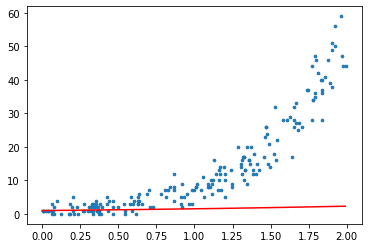

In [7]:
# Initial Guess For Beta
initial_beta = 0.42

# Make the Prediction
X = np.arange(0, 2, 0.01)
mu_predict = np.exp(X*initial_beta) # Initial Prediction is mu = exp(beta * x)

# Make Plots
plt.scatter(X_train, Y_train, s = 7)
plt.plot(X, mu_predict, color = 'red')

So, let us compute the gradient, as we found before, and perform gradient descent.

$$\frac{\partial S}{\partial \beta_1}=\sum_{i=1}^n\left[\mu_ix_{i1} - y_ix_{i1}\right]+2\lambda\beta_1$$

As a note I set regularisation strength to 0, just so our algorithm isn't biased.

In [8]:
initial_beta = 0.42
learning_rate, regularisation_strength = 0.001, 0

# Compute our initial prediction
mu_predict = np.exp(X_train*initial_beta)

# Compute the corresponding (initial) gradient
gradient_sum_term = np.mean([mu_predict[i]*X_train[i] - Y_train[i]*X_train[i] for i in range(len(X_train))])
gradient_reg_term = 2*regularisation_strength*initial_beta
gradient = gradient_sum_term + gradient_reg_term

# Update the beta by descending down the gradient
new_beta = initial_beta - learning_rate*gradient
print(f'First update of beta: {new_beta}')

First update of beta: 0.43840586506306156


Repeat!

It is important to recall the steps we are taking. We start with an initial random guess of $\beta$, call this $\beta^{(0)}$. Then, we will evaulate the derivative of the cost function at this value of $\beta_0$.
$$\large\frac{\partial S}{\partial \beta}\bigg{|}_{\beta_0}=\sum_{i=1}^n\left[\mu_ix_{i1} - y_ix_{i1}\right]+2\lambda\beta^{(0)}=\sum_{i=1}^n\left[e^{\beta^{(0)}X_i}x_{i1} - y_ix_{i1}\right]+2\lambda\beta^{(0)}$$

Then we update $\beta$ by using this beta,
$$\beta^{(1)} = \beta^{(0)}-\gamma\frac{\partial S}{\partial \beta}\bigg{|}_{\beta^{(0)}}$$

And repeat,
$$\beta^{(2)} = \beta^{(1)}-\gamma\frac{\partial S}{\partial \beta}\bigg{|}_{\beta^{(1)}}$$

So in general, at every step we have 2 $\beta$.
1. The current $\beta_{\textrm{current}}$
2. The next value of $\beta_{\textrm{next}}$.

Then we will evaluate the derivative at $\beta_{\textrm{current}}$, and say
$$\beta_{\textrm{next}} = \beta_{\textrm{current}}-\gamma\frac{\partial S}{\partial \beta}\bigg{|}_{\beta_{\textrm{current}}}$$

In [9]:
current_beta = 0.42
learning_rate, regularisation_strength = 0.01, 0

next_beta = current_beta

for i in range(400 + 1):
    current_beta = next_beta
    
    # To compute the gradient, we first need to evaluate mu_i with the current value of beta
    mu_predict = np.exp(X_train*current_beta)
    
    # Compute the corresponding gradient
    grad = np.mean([mu_predict[i]*X_train[i] - Y_train[i]*X_train[i] for i in range(len(X_train))])\
                                                        + 2*regularisation_strength*current_beta

    # Update the beta
    next_beta = current_beta - learning_rate*grad
    if i % 100 == 0:
        print(f'Iteration {i}: {current_beta}')

Iteration 0: 0.42
Iteration 100: 2.0047840393469802
Iteration 200: 2.0047840393469802
Iteration 300: 2.0047840393469802
Iteration 400: 2.0047840393469802


In [10]:
def perform_gradient_descent(initial_beta, X_train, Y_train, learning_rate = 0.01, 
                                             regularisation_strength = 0, steps = 100):
    """ Performs gradient descent on the training set
    
        Parameters
        ----------
        initial_beta : float
            The initial value of beta the initialise the gradient descent
        X_train : (N, ) np.array
            The input training values
        Y_train : (N, ) np.array
            The corresponding output values of the training data
        learning_rate : float, optional
            The learning rate/step size
        regularisation_strength : float, optional
            The regularisation on the coefficients
        steps : int
            The number of interations to perform
        
        Returns
        -------
        (steps, ) np.array
            The values that beta has taken during the descent phase
            
        Notes
        -----
        The basic assumption this algorithm makes is that Y|X ~ Poisson(e^{b*X}), with X being 
        having only 1 feature. The algorithm will then perform gradient descent to find the value of
        b that best suits the given dataset
    """
    beta_values = np.zeros(steps)
    
    next_beta = initial_beta
    for i in range(steps):
        current_beta = next_beta

        # To compute the gradient, we first need to evaluate mu_i with the current value of beta        
        mu_predict = np.exp(X_train*current_beta)

        # Compute the corresponding gradient
        grad = np.mean([mu_predict[i]*X_train[i] - Y_train[i]*X_train[i] for i in range(len(X_train))])\
                                                            + 2*regularisation_strength*current_beta

        # Update the beta
        next_beta = current_beta - learning_rate*grad
        
        beta_values[i] = next_beta
        
    return beta_values

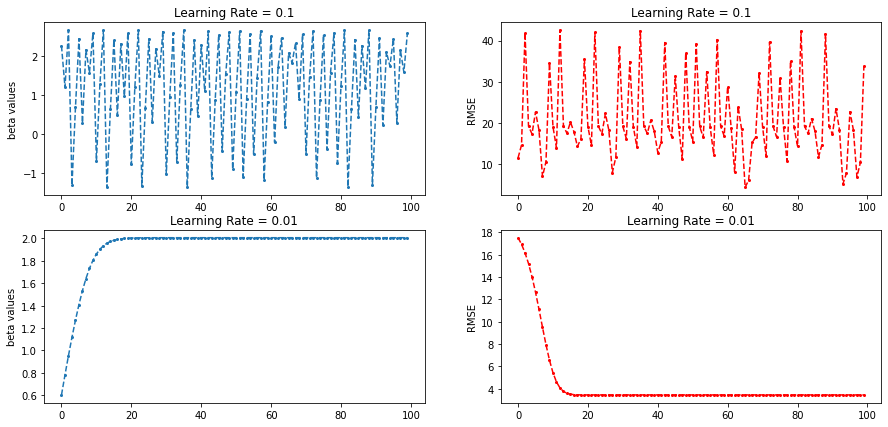

In [11]:
initial_beta, steps = 0.42, 100
learning_rates = [0.1, 0.01]

fig = plt.figure(figsize = (15, 7))
for i, learning_rate in enumerate(learning_rates):
    beta_values = perform_gradient_descent(initial_beta, X_train, Y_train, steps = steps, learning_rate = learning_rate)
    plt.subplot(2, 2, 2*i + 1)
    plt.plot(beta_values, 'o--', markersize = 2)
    plt.title(f'Learning Rate = {round(learning_rate, 3)}')
    plt.ylabel('beta values')
    
    plt.subplot(2, 2, 2*i + 2)
    Y_predictions = [np.exp(X_train*beta) for beta in beta_values]
    errors = [np.sqrt(np.mean((Y_pred - Y_train)**2)) for Y_pred in Y_predictions]
    
    plt.plot(errors, 'o--', markersize = 2, color = 'red')
    plt.title(f'Learning Rate = {round(learning_rate, 3)}')
    plt.ylabel('RMSE')

#### Different Value of $\beta$

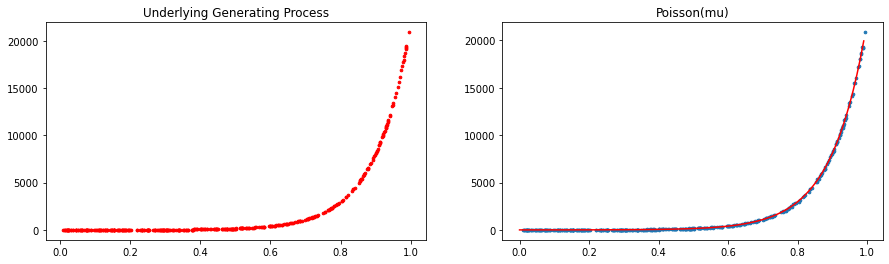

In [12]:
fig = plt.figure(figsize = (15, 4))

true_beta = 10

# Get the underying generating process
X = np.random.rand(400)
mu = np.exp(true_beta*X)

# Plot the Underlying generating process
plt.subplot(1, 2, 1)
plt.scatter(X, mu, s = 7, color = 'red')
plt.title('Underlying Generating Process')


# Sample from Poisson(mu_i)
n = 1 # At each point of X_i, take 10 samples
Y_train = np.array([np.random.poisson(lam = lam, size = n) for lam in mu]).flatten()
X_train = np.array([x*np.ones(n) for x in X]).flatten()

# Plot the Sampled Points
plt.subplot(1, 2, 2)
plt.scatter(X_train, Y_train, s = 7)

X = np.arange(0, 1, 0.01)
plt.plot(X, np.exp(true_beta*X), color = 'red')
plt.title('Poisson(mu)');

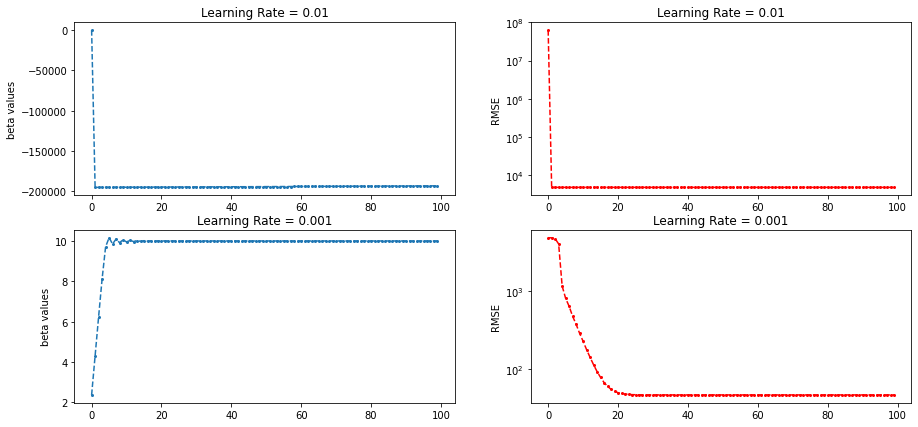

In [13]:
initial_beta, steps = 0.42, 100
learning_rates = [0.01, 0.001]

fig = plt.figure(figsize = (15, 7))
for i, learning_rate in enumerate(learning_rates):
    beta_values = perform_gradient_descent(initial_beta, X_train, Y_train, steps = steps, learning_rate = learning_rate)
    plt.subplot(2, 2, 2*i + 1)
    plt.plot(beta_values, 'o--', markersize = 2)
    plt.title(f'Learning Rate = {round(learning_rate, 3)}')
    plt.ylabel('beta values')
    
    plt.subplot(2, 2, 2*i + 2)
    Y_predictions = [np.exp(X_train*beta) for beta in beta_values]
    errors = [np.sqrt(np.mean((Y_pred - Y_train)**2)) for Y_pred in Y_predictions]
    
    plt.plot(errors, 'o--', markersize = 2, color = 'red')
    plt.title(f'Learning Rate = {round(learning_rate, 3)}')
    plt.yscale('symlog')
    plt.ylabel('RMSE')

### Stochastic/Batch Gradient Descent
Easy! Just randomly sample from the training set

Important note: 
- Stochastic Gradient Descent typically refers to the situation where you only use 1 data points
- Batch gradient descent typically refers to where you take random sample more than 1 data point

In [19]:
def perform_stochastic_gradient_descent(initial_beta, X_train, Y_train, learning_rate = 0.01, 
                                             regularisation_strength = 0, steps = 100, batch_size = 10):
    """
    """
    beta_values = np.zeros(steps)
    
    next_beta = initial_beta
    for i in range(steps):
        current_beta = next_beta

        random_indexes = random.sample(list(np.arange(len(X_train))), batch_size)
        mu_predict = np.exp(X_train*current_beta)

        # Compute the corresponding gradient
        grad = np.mean([mu_predict[i]*X_train[i] - Y_train[i]*X_train[i] for i in random_indexes])\
                                                            + 2*regularisation_strength*current_beta

        # Update the beta
        next_beta = current_beta - learning_rate*grad
        
        beta_values[i] = next_beta
        
    return beta_values

In [15]:
import random

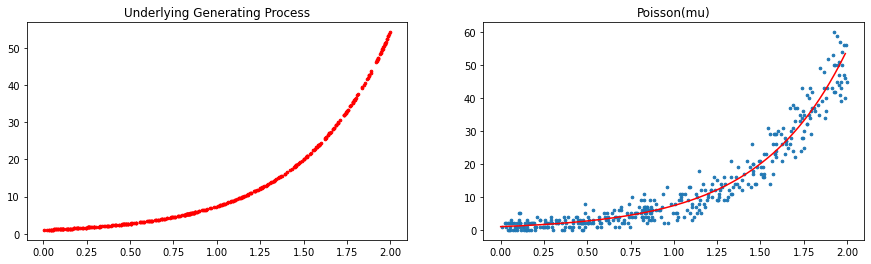

In [20]:
fig = plt.figure(figsize = (15, 4))

true_beta = 2

# Get the underying generating process
X = np.random.rand(400)*2
mu = np.exp(true_beta*X)

# Plot the Underlying generating process
plt.subplot(1, 2, 1)
plt.scatter(X, mu, s = 7, color = 'red')
plt.title('Underlying Generating Process')


# Sample from Poisson(mu_i)
n = 1 # At each point of X_i, take 10 samples
Y_train = np.array([np.random.poisson(lam = lam, size = n) for lam in mu]).flatten()
X_train = np.array([x*np.ones(n) for x in X]).flatten()

# Plot the Sampled Points
plt.subplot(1, 2, 2)
plt.scatter(X_train, Y_train, s = 7)

X = np.arange(0, 2, 0.01)
plt.plot(X, np.exp(true_beta*X), color = 'red')
plt.title('Poisson(mu)');

# Errata
At around this point of the recording (51 min to 54 min) I realised I made a mistake in my code. But this code is now correct.

It is important to remember that each time you compute the gradient $\cfrac{\partial S}{\partial \beta}$ you randomly sample from the dataset EVERY TIME you compute the gradient. Meaning that the 1st update of $\beta$ will use a different sample than the 2nd update, which will be different from the 3rd update and so on. 

I made the mistake in the original code that I sampled from the dataset once, and use that sample to compute the gradient descent. Which is the reason why I get convergence to really weird numbers.

Now that I randomly sample each time I compute the gradient you can see that for different runs of stochastic gradient descent I generally do get convergence to $\beta_{\textrm{true}} = 2$. But convergence is very clear with learning rate of 0.01 and batch size of 10.

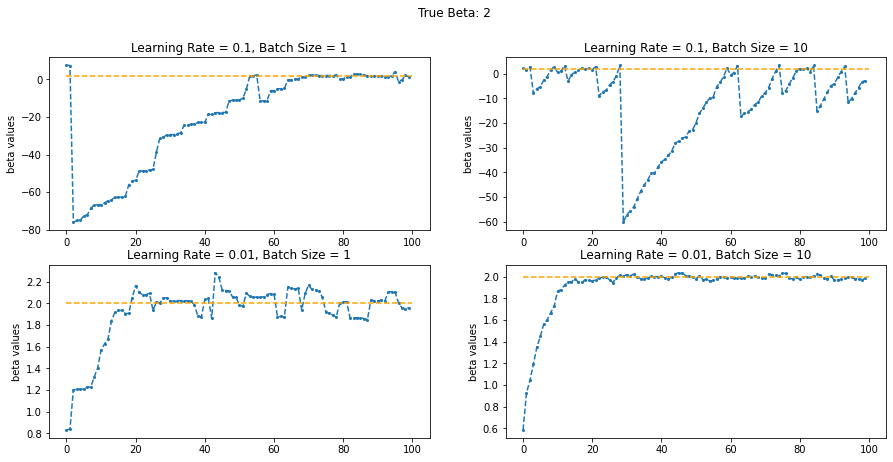

In [23]:
initial_beta, steps = 0.42, 100
learning_rates = [0.1, 0.01]

fig = plt.figure(figsize = (15, 7))

# Set the seed to the meaning of life
random.seed(42)

plot_beta = True # If you want to pring RMSE set this to false

for i, learning_rate in enumerate(learning_rates):
    # The All important random selection of the training sets
    
    for k, batch_size in enumerate([1, 10]):
        beta_values = perform_stochastic_gradient_descent(initial_beta, X_train, Y_train, steps = steps, 
                                                            learning_rate = learning_rate, batch_size = batch_size)
        # Make pretty plots
        plt.subplot(2, 2, 2*i + 1 + k)
        
        if plot_beta:
            plt.plot(beta_values, 'o--', markersize = 2)
            plt.title(f'Learning Rate = {round(learning_rate, 3)}, Batch Size = {batch_size}')
            plt.plot([0, 100], [2, 2], '--', color = 'orange')
            plt.ylabel('beta values')
        else:
            Y_predictions = [np.exp(X_train*beta) for beta in beta_values]
            errors = [np.sqrt(np.mean((Y_pred - Y_train)**2)) for Y_pred in Y_predictions]
            plt.plot(errors, 'o--', markersize = 2, color = 'red')
            plt.ylabel('RMSE')
        
plt.suptitle(f'True Beta: {true_beta}');

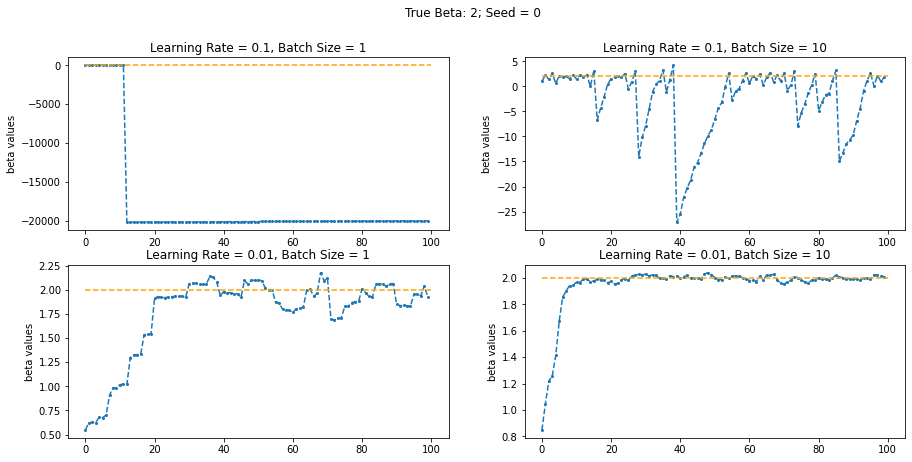

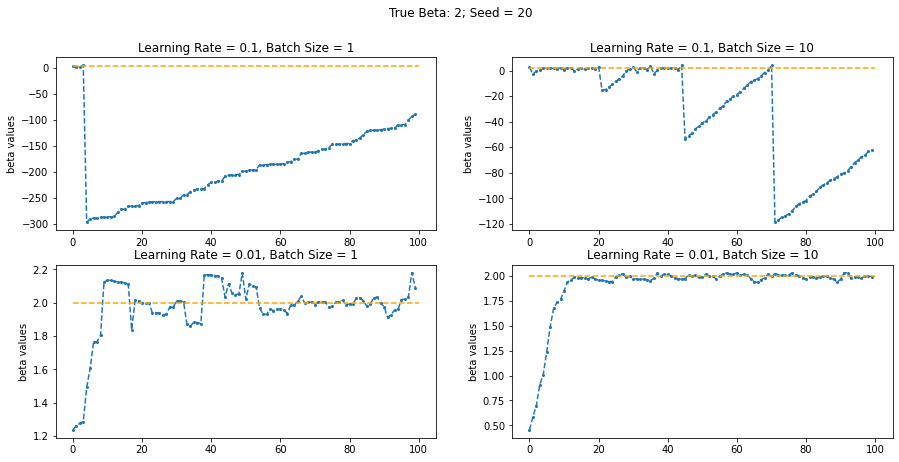

In [25]:
initial_beta, steps = 0.42, 100
learning_rates = [0.1, 0.01]

plot_beta = True # If you want to pring RMSE set this to false

for seed in [0, 20]:
    random.seed(seed)
    fig = plt.figure(figsize = (15, 7))
    for i, learning_rate in enumerate(learning_rates):
        # The All important random selection of the training sets

        for k, batch_size in enumerate([1, 10]):
            beta_values = perform_stochastic_gradient_descent(initial_beta, X_train, Y_train, steps = steps, 
                                                            learning_rate = learning_rate, batch_size = batch_size)

            # Make pretty plots
            plt.subplot(2, 2, 2*i + 1 + k)
            if plot_beta:
                plt.plot(beta_values, 'o--', markersize = 2)
                plt.title(f'Learning Rate = {round(learning_rate, 3)}, Batch Size = {batch_size}')
                plt.plot([0, 100], [2, 2], '--', color = 'orange')
                plt.ylabel('beta values')
            else:
                Y_predictions = [np.exp(X_train*beta) for beta in beta_values]
                errors = [np.sqrt(np.mean((Y_pred - Y_train)**2)) for Y_pred in Y_predictions]
                plt.plot(errors, 'o--', markersize = 2, color = 'red')
                plt.ylabel('RMSE')

    #    plt.subplot(2, 2, 2*i + 2)
    #    Y_predictions = [np.exp(X_train*beta) for beta in beta_values]
    #    errors = [np.sum((Y_pred - Y_train)**2) for Y_pred in Y_predictions]

    #    plt.plot(errors, 'o--', markersize = 2, color = 'red')
    #    plt.title(f'Learning Rate = {round(learning_rate, 3)}')
    #    plt.ylabel('MSE')
    plt.suptitle(f'True Beta: {true_beta}; Seed = {seed}');
    plt.show();

# Errata
At the end of the recording (59 min) I talk about how stochastic gradient descent actually makes you jump out of the local minimums, and you actually move up the hill instead of down the hill. You can actually see this with the learning rate of 0.1 and batch size of 10. In the beginning it is converging to 2 but randomly it jumps very far away to -60, escaping the local minimum.

As a general rule of thumb
- Smaller learning rate is good - This makes it more likely for our algorithm to converge
    - But it may take a very long time to converge. What you typically do is set a dynamic learning rate. Start with large learning rates, and over time make it smaller and smaller
    - Momentum! The general idea is that in the beginning you have a lot of energy and so you take large steps. But as you perform gradient descent you begin to loose energy and so you take smaller steps.
- Larger batch sizes is good - This makes the computation of the gradient more stable, and will be closer to the gradient of the whole data set.
    - Too large batch sizes is not good because computation time is large. Typically batch size is fixed and isn't changed during training. 
    - As a personal preference, I like setting my batch sizes to powers of 2, so (64, 128, 256, 512). But maybe you like the powers more (9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196)


# Deterministic Vs Stochastic
It's important to recognise that gradient descent is a deterministic algorithm. Meaning that every time you run it you get the same results. This is because each time you compute the gradient you are using the same set of data. Hence the direction in which you travel is the same across different runs.

Stochastic or batch gradient descent is non-deterministic. Meaning that every time you run it you get different results. This is because you use different sets of the data every time you run the algorithm. Hence the direction in which you travel is different across different runs.